# NLP with sentiment analysis

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
review = pd.read_csv('./datasets/imdb-reviews-pt-br.csv')

In [3]:
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
review

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [5]:
train, test, class_train, class_test = train_test_split(review.text_pt, 
                                                        review.sentiment, 
                                                        test_size = 0.2, 
                                                        random_state = 42)

In [6]:
# logistic_regression = LogisticRegression()
# logistic_regression.fit(train, class_train)
# accuracy = logistic_regression.score(test, class_test)
# print(accuracy)

In [7]:
print("Negative \n")
print(review.text_pt[review.sentiment == 'neg'].head())

Negative 

0    Mais uma vez, o Sr. Costner arrumou um filme p...
1    Este é um exemplo do motivo pelo qual a maiori...
2    Primeiro de tudo eu odeio esses raps imbecis, ...
3    Nem mesmo os Beatles puderam escrever músicas ...
4    Filmes de fotos de latão não é uma palavra apr...
Name: text_pt, dtype: object


In [8]:
print("Positive \n")
print(review.text_pt[review.sentiment == 'pos'].head())

Positive 

12389    Eu fui e vi este filme ontem à noite depois de...
12390    O diretor do ator, Bill Paxton, segue sua prom...
12391    Como um jogador de recreio com algum conhecime...
12392    Eu vi esse filme em uma prévia, e é delicioso....
12393    Bill Paxton levou a verdadeira história do gol...
Name: text_pt, dtype: object


In [9]:
# checking if the data is balanced
print(review.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [10]:
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [11]:
# converting the sentiment to binary
classifications = review['sentiment'].replace(['neg', 'pos'], [0, 1])
review['classifications'] = classifications

In [12]:
review.head()

,id,text_en,text_pt,sentiment,classifications
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [13]:
review.tail()

,id,text_en,text_pt,sentiment,classifications
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


## Bag of Words: creating representations of human language for machines

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['Assisti um filme ótimo', 'Assisti um filme ruim']

vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(text)

In [15]:
vectorizer.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [16]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [17]:
sparse_matrix =  pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names_out())

In [18]:
sparse_matrix

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [19]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(review.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [20]:
def text_classifier(text, text_column, classification_column):
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(text[text_column])
    train, test, train_class, test_class = train_test_split(bag_of_words,
                                                              text[classification_column],
                                                              random_state = 42)
    logistic_regression = LogisticRegression(solver = "lbfgs")
    logistic_regression.fit(train, train_class)
    return logistic_regression.score(test, test_class)
print(text_classifier(review, "text_pt", "classifications"))

0.6583097452486858


## wordcloud: visual representation of text data

In [21]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in review.text_pt])

wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,).generate(all_words)

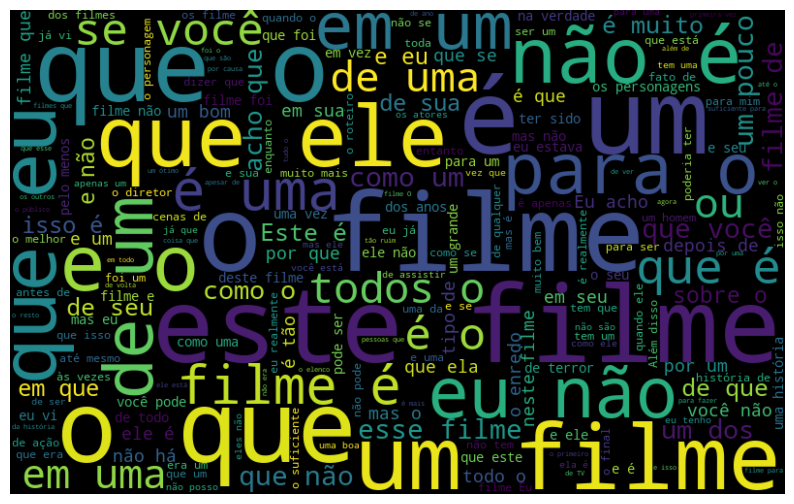

In [23]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
def word_cloud_neg(text, column):
    text_negative = text.query("sentiment == 'neg'")
    all_words = ' '.join([text for text in text_negative[column]])
    wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [25]:
def word_cloud_pos(text, column):
    text_positive = text.query("sentiment == 'neg'")
    all_words = ' '.join([text for text in text_positive[column]])
    wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


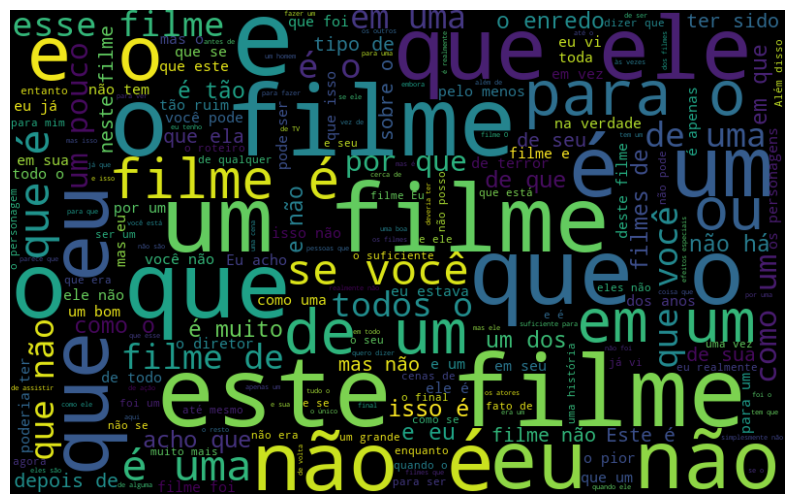

In [26]:
word_cloud_neg(review, "text_pt")

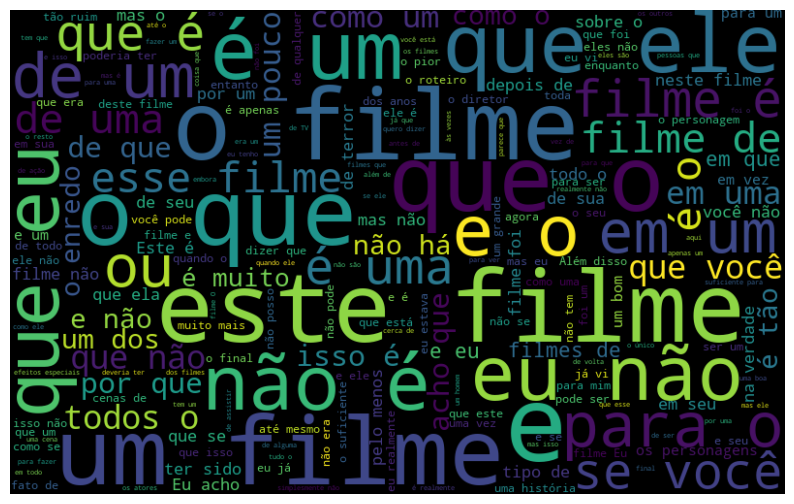

In [27]:
word_cloud_pos(review, "text_pt")

## NLTK: Natural Language Toolkit

In [28]:
!pip install -U nltk


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\juliano
[nltk_data]    |     soares\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\juliano
[nltk_data]    |     soares\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\juliano
[nltk_data]    |     soares\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\juliano
[nltk_data]    |     soares\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nlt

True

In [30]:
phrase = ['Assisti um filme ótimo', 'Assisti um filme ruim']
frequency = nltk.FreqDist(phrase)
frequency

FreqDist({'Assisti um filme ótimo': 1, 'Assisti um filme ruim': 1})

In [31]:
from nltk import tokenize

phrase = 'Assisti um filme ótimo.'

token_space = tokenize.WhitespaceTokenizer()
token_phrase = token_space.tokenize(phrase)
token_phrase

['Assisti', 'um', 'filme', 'ótimo.']

In [32]:
token_phrase = token_space.tokenize(all_words)
frequency = nltk.FreqDist(token_phrase)
df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})

In [33]:
df_frequency.nlargest(columns = "Frequency", n = 10)

,Word,Frequency
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


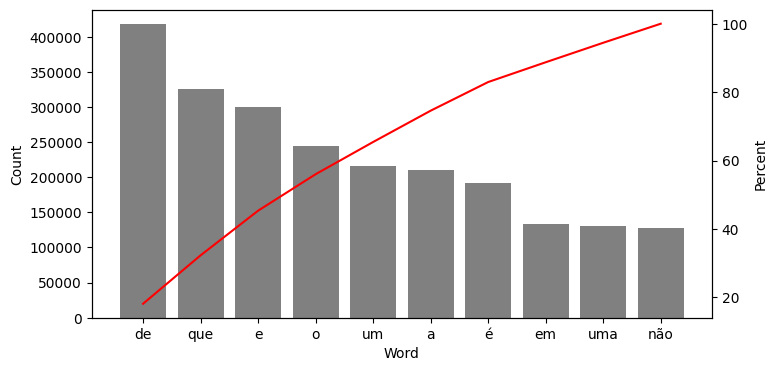

In [38]:
import seaborn as sns

def pareto(text, text_column, quantity):
    all_words = ' '.join([text for text in text[text_column]])
    token_space = tokenize.WhitespaceTokenizer()
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    
    total = df_frequency['Frequency'].sum()
    df_frequency['Percent'] = df_frequency['Frequency'].cumsum() / total * 100
    
    plt.figure(figsize=(8,4))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'gray')
    ax2 = ax.twinx()
    sns.lineplot(data=df_frequency, x='Word', y='Percent', color='red', sort=False, ax=ax2)
    ax.set(ylabel = "Count")
    plt.show()

pareto(review, "text_pt", 10)

In [40]:
stopwords = nltk.corpus.stopwords.words('portuguese')

processed_phrase = list()
for opinion in review.text_pt:
    new_phrase = list()
    phrase = token_space.tokenize(opinion)
    for word in phrase:
        if word not in stopwords:
            new_phrase.append(word)
    processed_phrase.append(' '.join(new_phrase))

review["treatment_1"] = processed_phrase

In [41]:
text_classifier(review, "treatment_1", "classifications")

0.6811160533764659

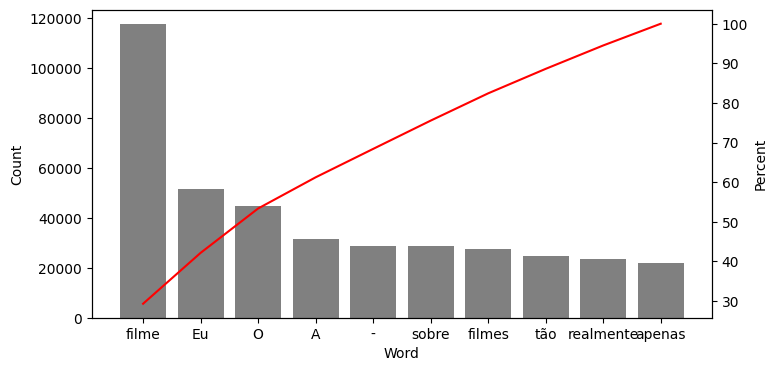

In [42]:
pareto(review, "treatment_1", 10)